# Lecture 6

In [2]:
from google.colab import files
from google.colab.patches import cv2_imshow
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

In [3]:
# file upload
uploaded_file = files.upload()

Saving car1.jpg to car1.jpg


In [5]:
img = cv2.imread('car1.jpg')

## 지난 시간 복습

In [41]:
row = 150 #@param {type: "slider", min:0, max:1280, step:1}
col = 150 #@param {type: "slider", min:0, max:720, step:1}
size = 100 #@param {type: "slider", min:0, max:1280, step:1}

In [42]:
height, width = img.shape[:2]
center = (width//2, height//2) # col, row

In [ ]:
# cropped
cropped = img[row:row+size, col:col+size]
cv2_imshow(cropped)

# translated (moved)
M = np.float32([[1,0,100],[0,1,50]])
translated = cv2.warpAffine(img, M, (width, height))
cv2_imshow(translated)

# rotated
M = cv2.getRotationMatrix2D(center, 90, 1)
rotated = cv2.warpAffine(img,M,(width,height))
cv2_imshow(rotated)

# resize
ratio = 1/10
resized =  cv2.resize(img, (int(width*ratio),int(height*ratio)), interpolation= cv2.INTER_CUBIC)
cv2_imshow(resized)


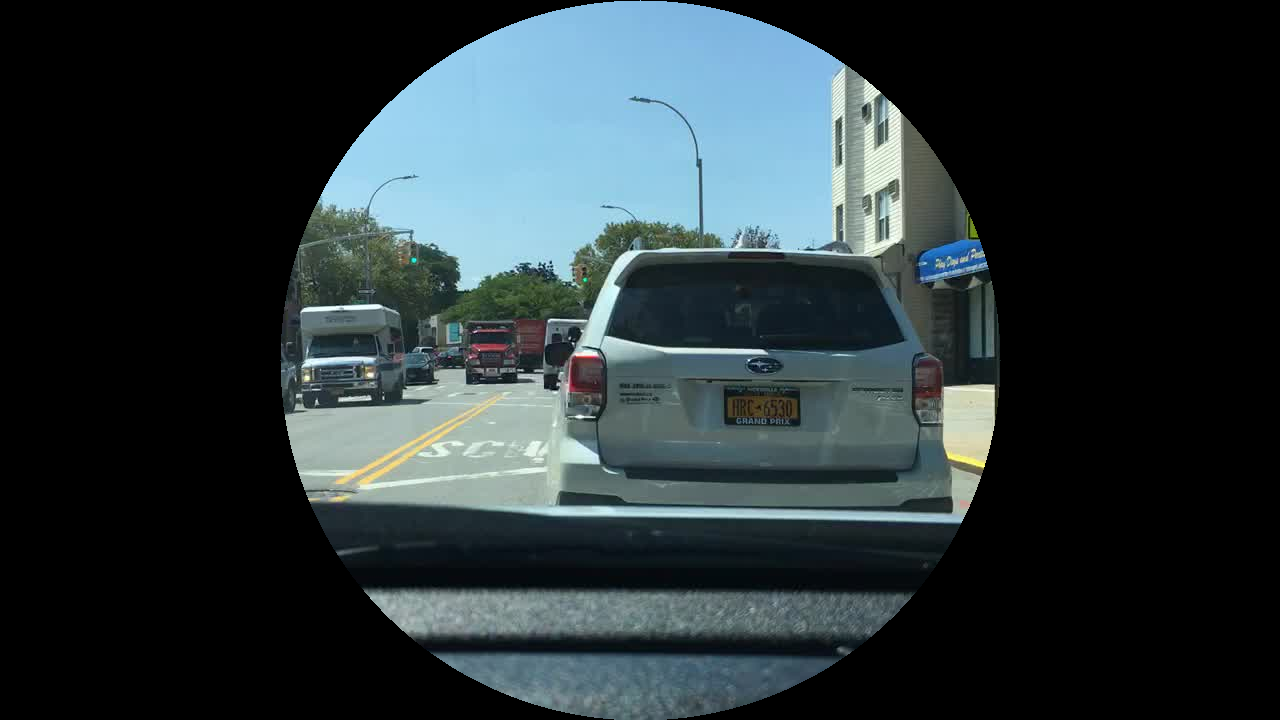

In [21]:
# mask
mask = np.zeros(img.shape[:2],dtype= np.uint8) 
# notice that there is no dimension for 'channel'.
# 0 --> black --> False indexing
# 255--> white --> True indexing
mask = cv2.circle(mask, center, height//2, 255 ,-1)
masked = cv2.bitwise_and(img,img,mask=mask)
cv2_imshow(masked)

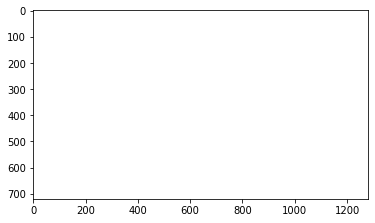

In [44]:
# drawing some pictures
background = np.full(img.shape, 255, np.uint8)
plt.imshow(background)

In [ ]:
cv2.rectangle(background, (row,col),(row+size,col+size),(0,255,0),5)
cv2.circle(background, (row+size*3,col+size//2),size//2, (255,0,0) ,-1)
cv2.putText(background,'creApple', (row+size*5,col), cv2.FONT_HERSHEY_COMPLEX, 1, (0,0,0))

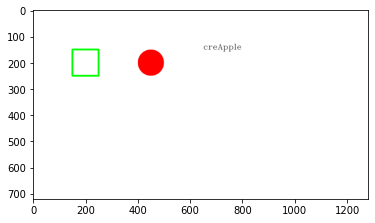

In [46]:
plt.imshow(background)

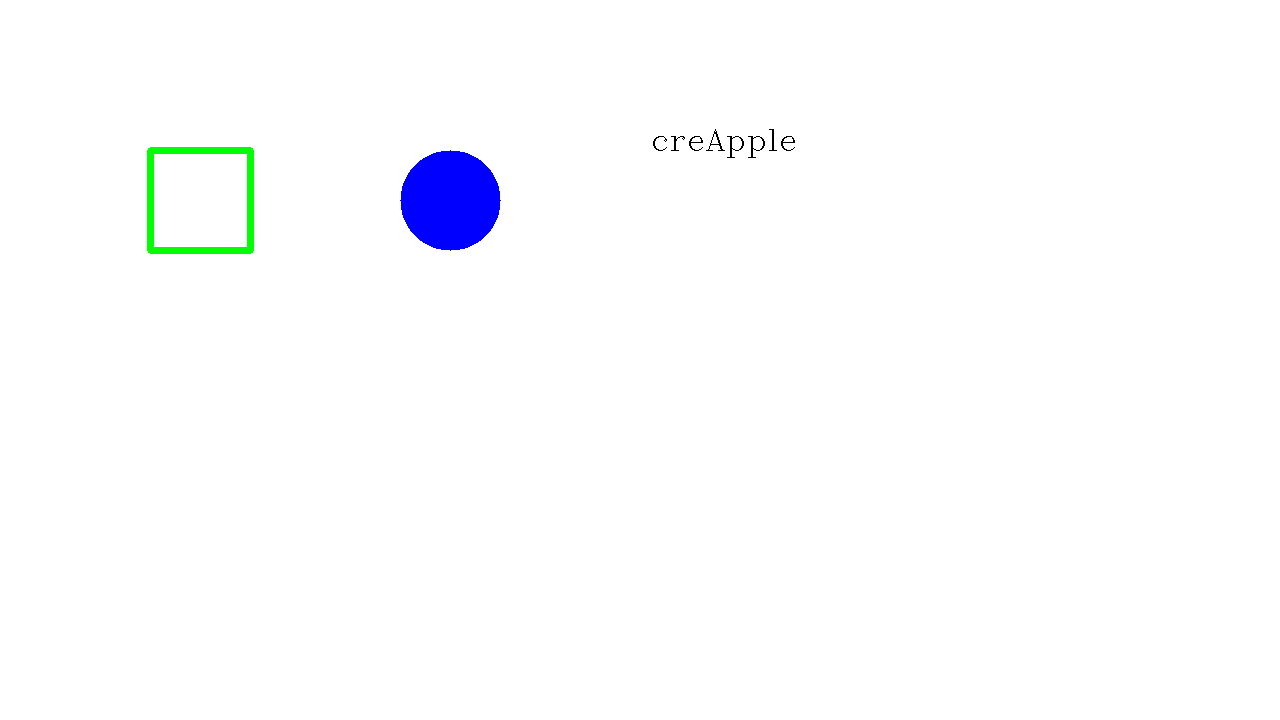

In [47]:
cv2_imshow(background) # BGR order...

In [48]:
# to save the image
cv2.imwrite('plt-copy.jpg', background)

True

In [50]:
def download(path):
    try:
        from google.colab import files
        files.download(path)
    except:
        import os
        print("Error download: ", os.path.join(os.getcwd(), path))

In [51]:
download('plt-copy.jpg')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Filter



In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from google.colab.patches import cv2_imshow
img = cv2.imread('car1.jpg')

In [39]:
height, width = img.shape[:2]
center = (width//2,height//2) # col, row

In [40]:
X = 150 #@param {type: "slider", min: 0, max: 1280, step:1}
Y = 150 #@param {type: "slider", min: 0, max: 720, step: 1}
SIZE = 100 #@param {type: "slider", min: 0, max: 1250, step: 1}

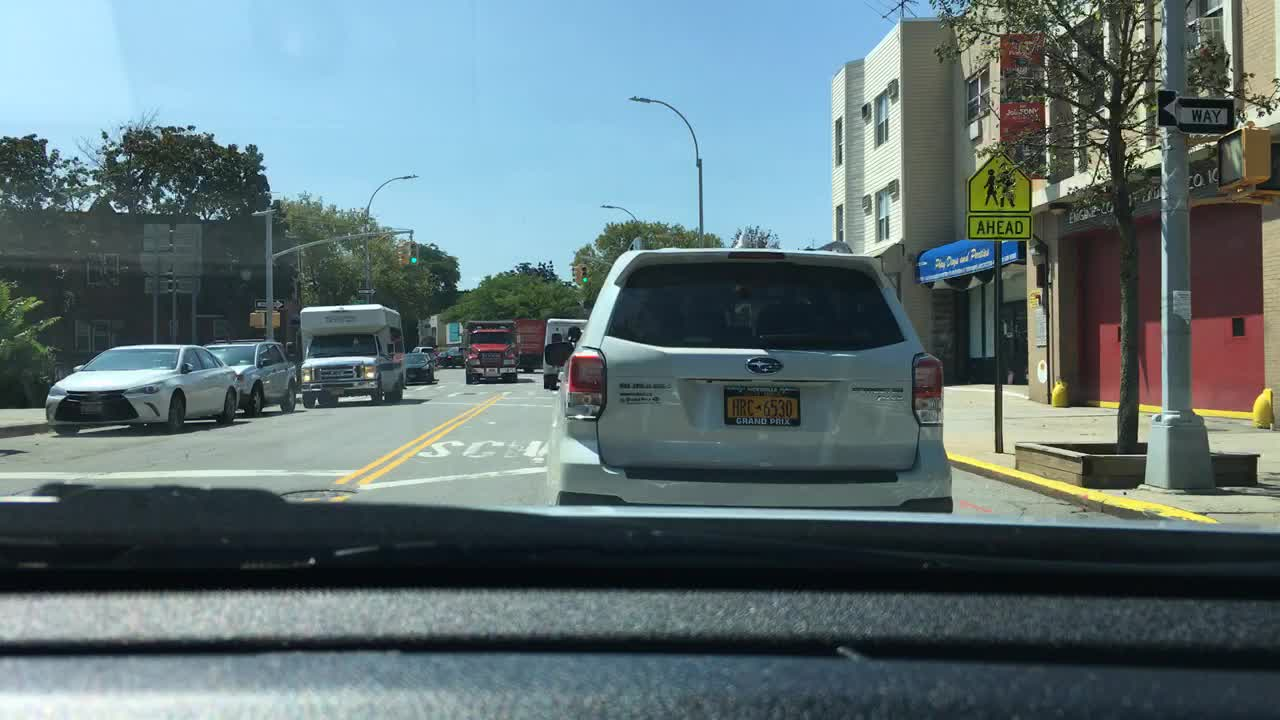

In [52]:
cv2_imshow(img)

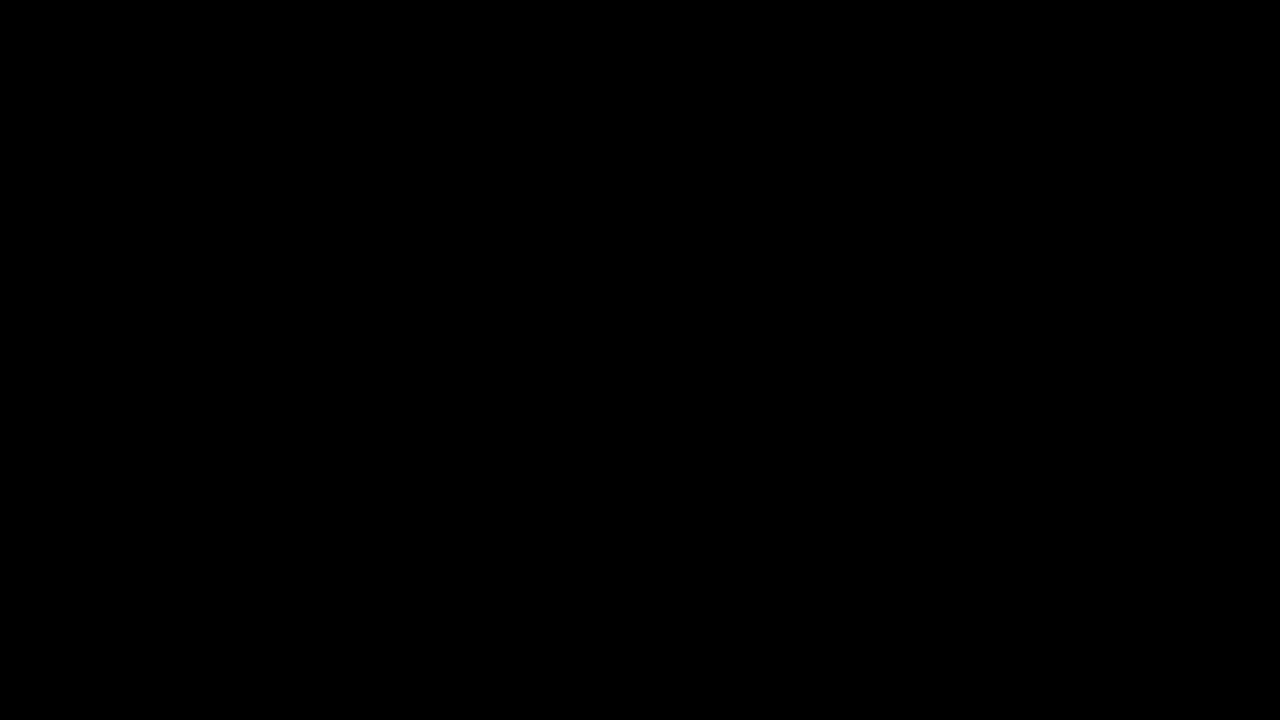

In [53]:
zeros = np.zeros(img.shape[:2], np.uint8)
cv2_imshow(zeros)

In [54]:
(Blue, Green, Red) = cv2.split(img) # channel 별로 split

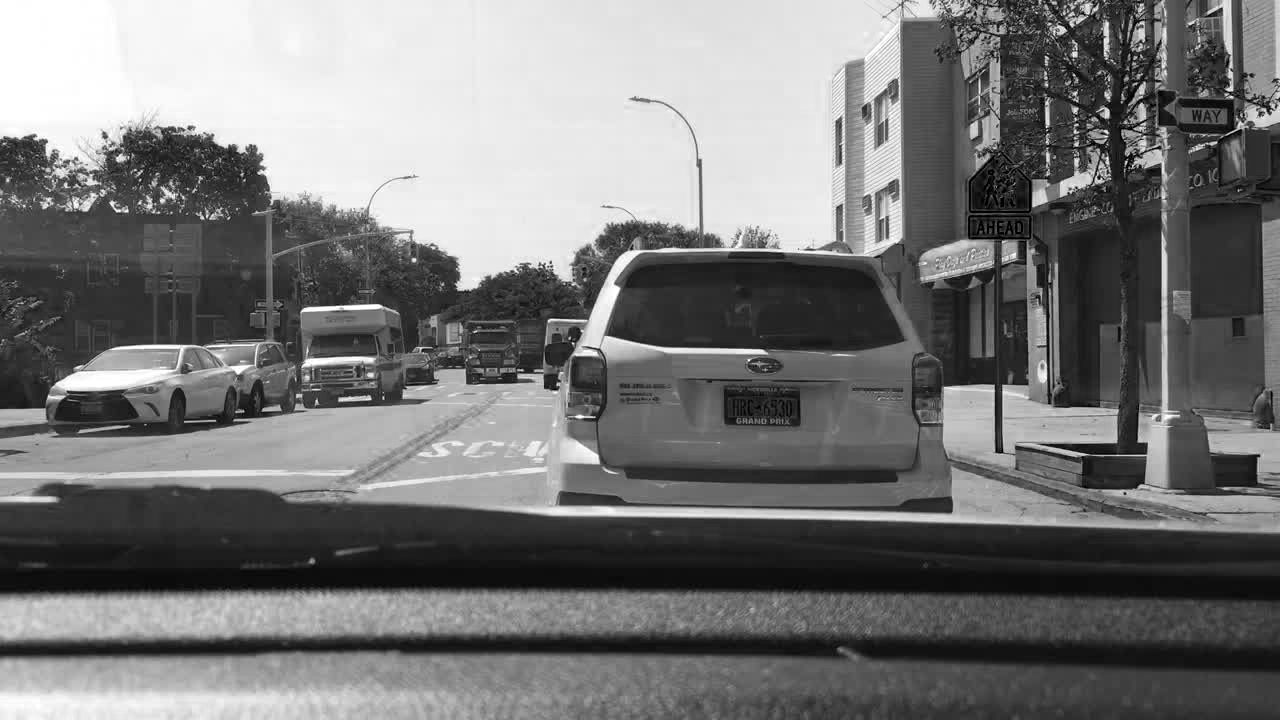

In [55]:
cv2_imshow(Blue)
# 엥...?
# there is no dimension for channel
# therefore, gray filter is applied.

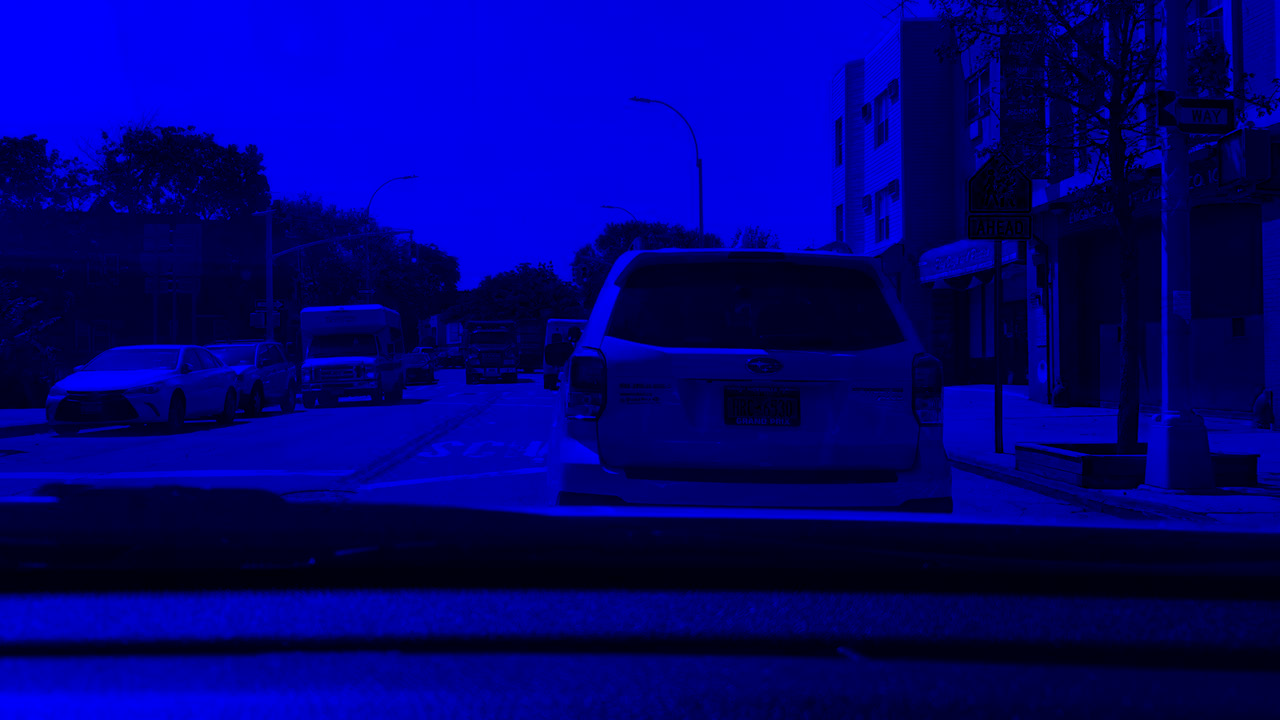

In [57]:
# 실제로 B,G,R 채널별로 보고 싶은 경우
# cv2.merge() 사용.
cv2_imshow(cv2.merge([Blue, zeros, zeros]))

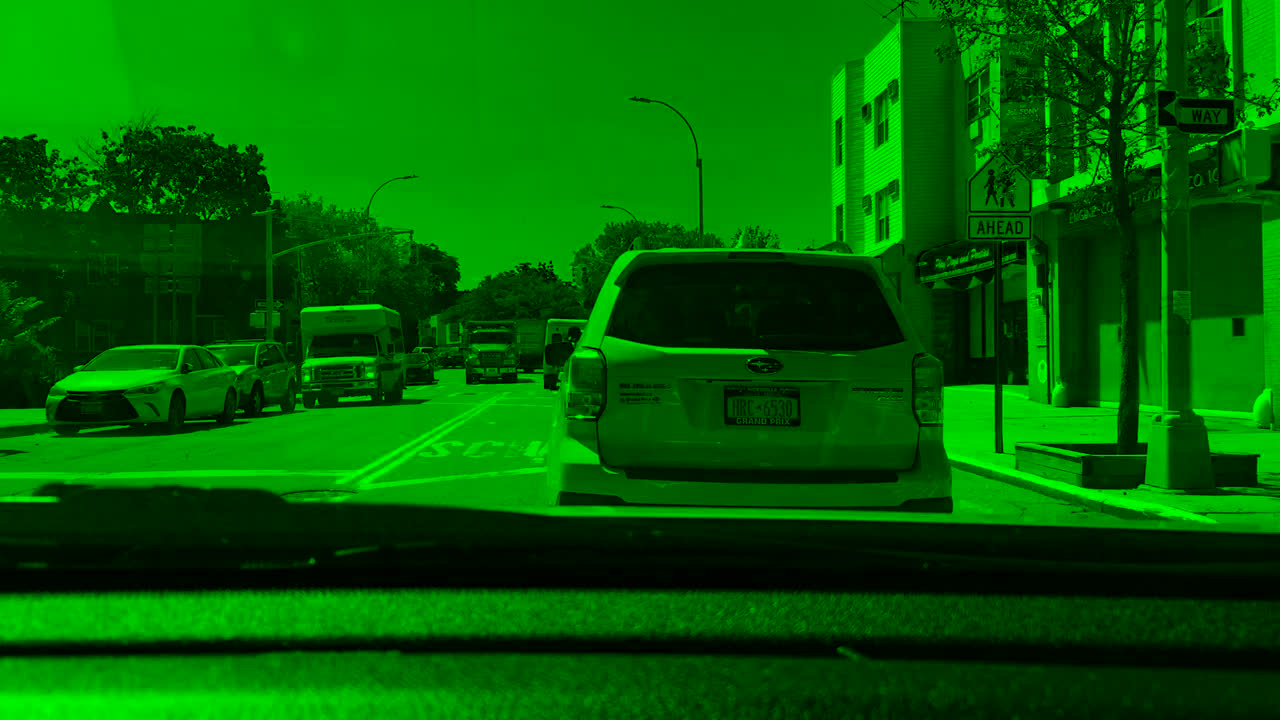

In [58]:
cv2_imshow(cv2.merge([zeros, Red, zeros]))

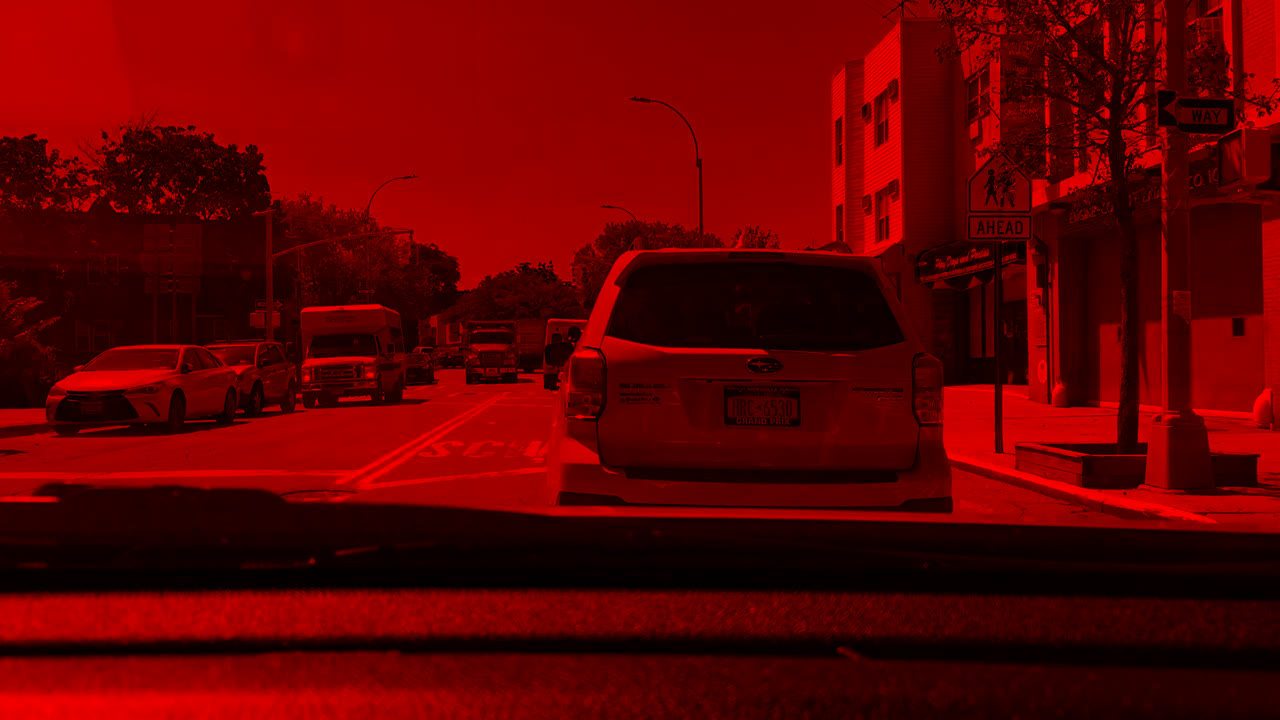

In [59]:
cv2_imshow(cv2.merge([zeros, zeros, Red]))

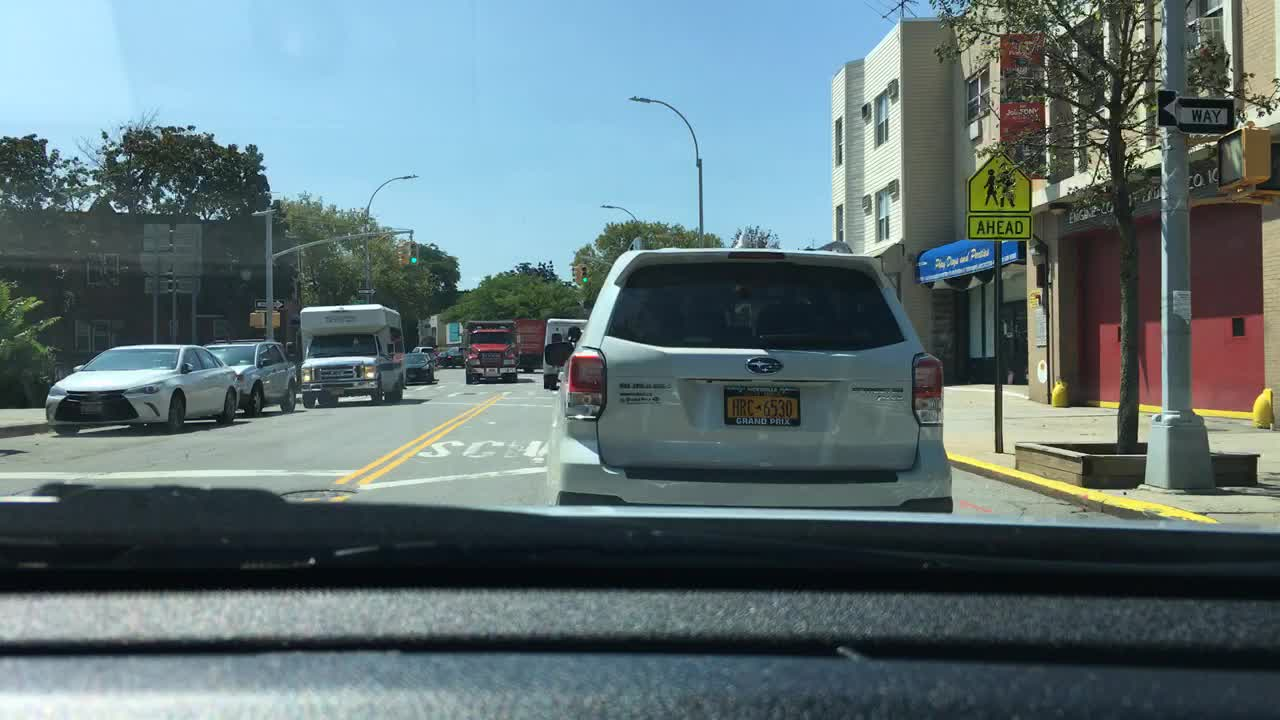

In [60]:
cv2_imshow(cv2.merge([Blue, Green, Red]))

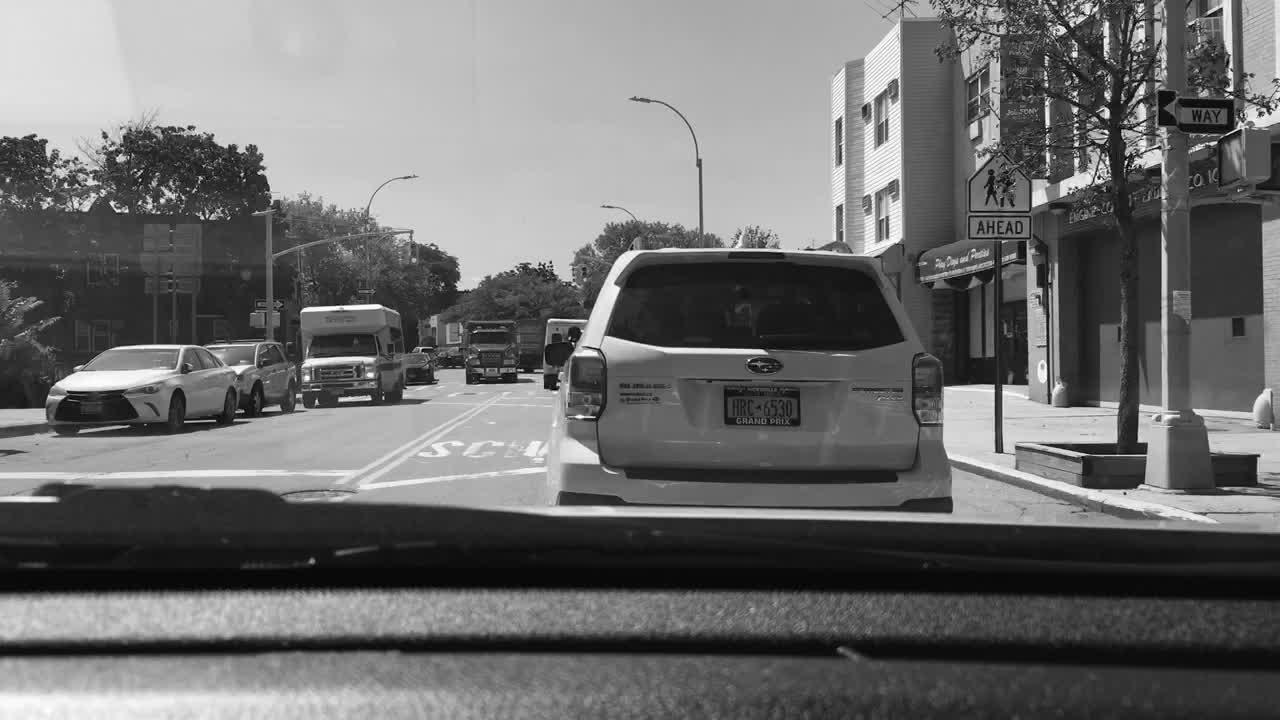

In [61]:
# convert coloer 이용
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)

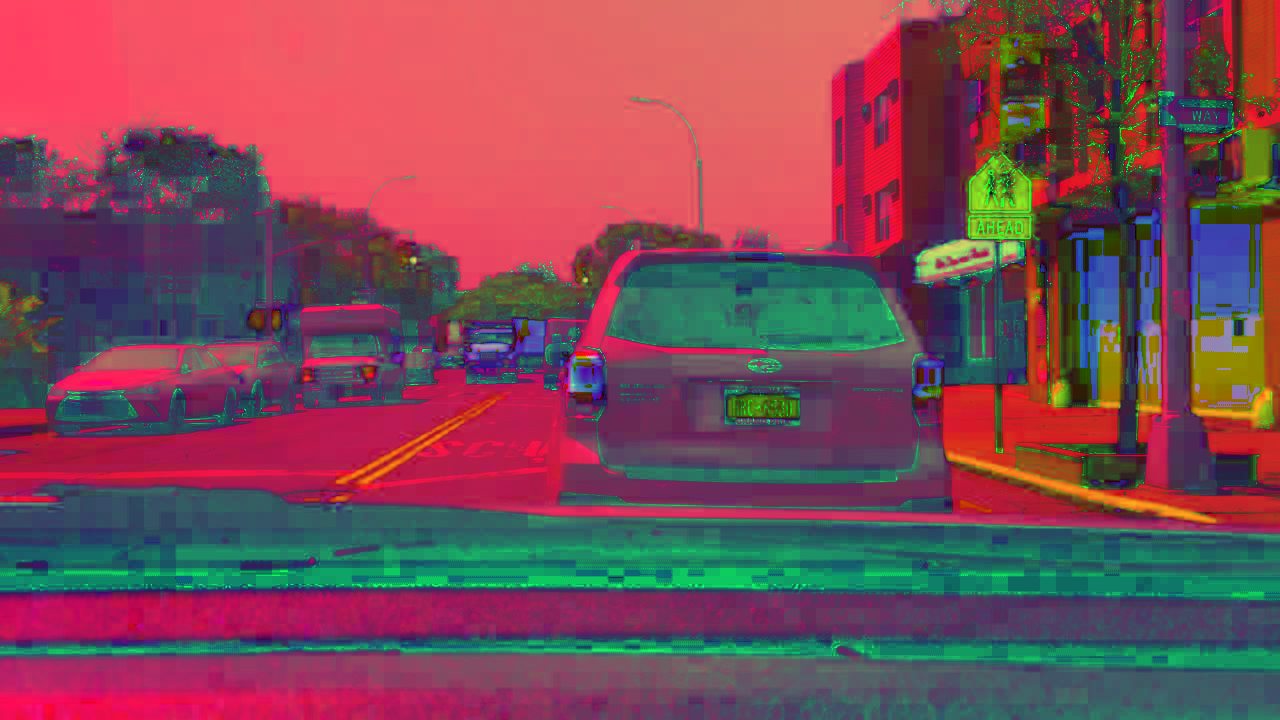

In [62]:
# HSV filter
# Hue(색조), Saturation(채도), Value(명도), 3가지 성분의 조합으로 표현
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
cv2_imshow(hsv)

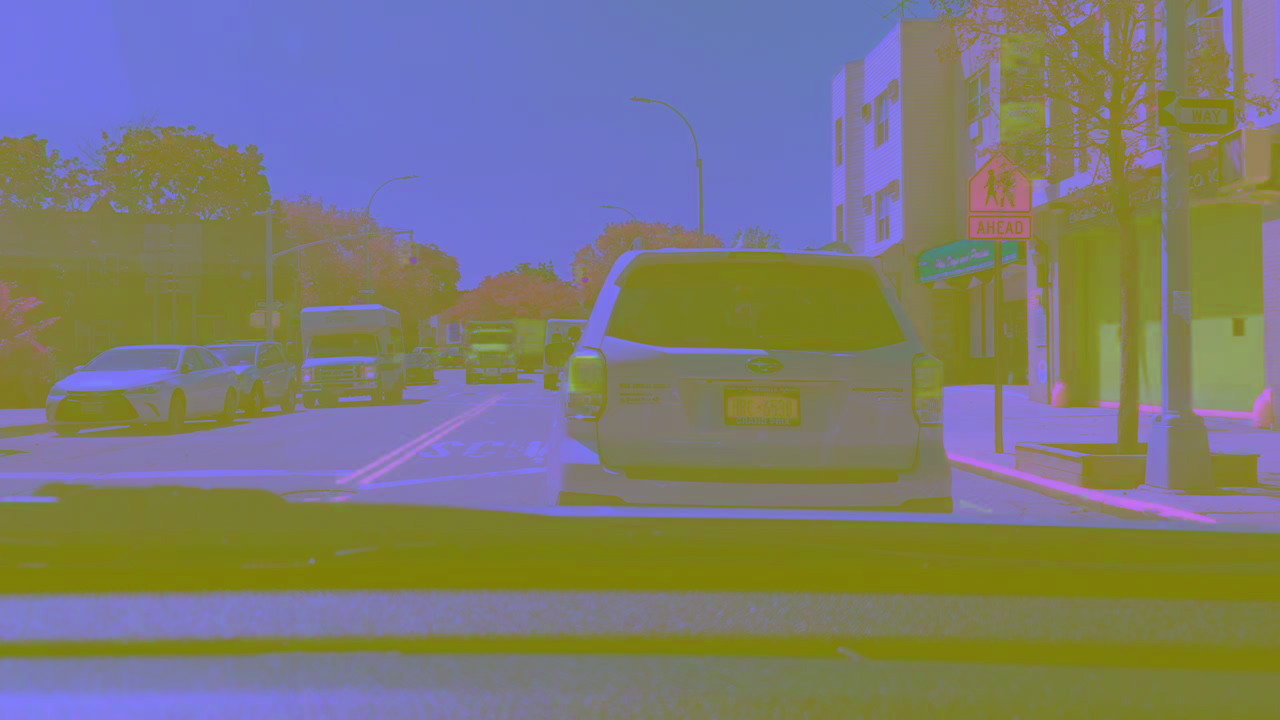

In [63]:
# lab filter
lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
cv2_imshow(lab)

여러 필터를 사용하는 이유는 모델을 더 잘 학습시키기 위함.

윤곽선을 찾는 법?

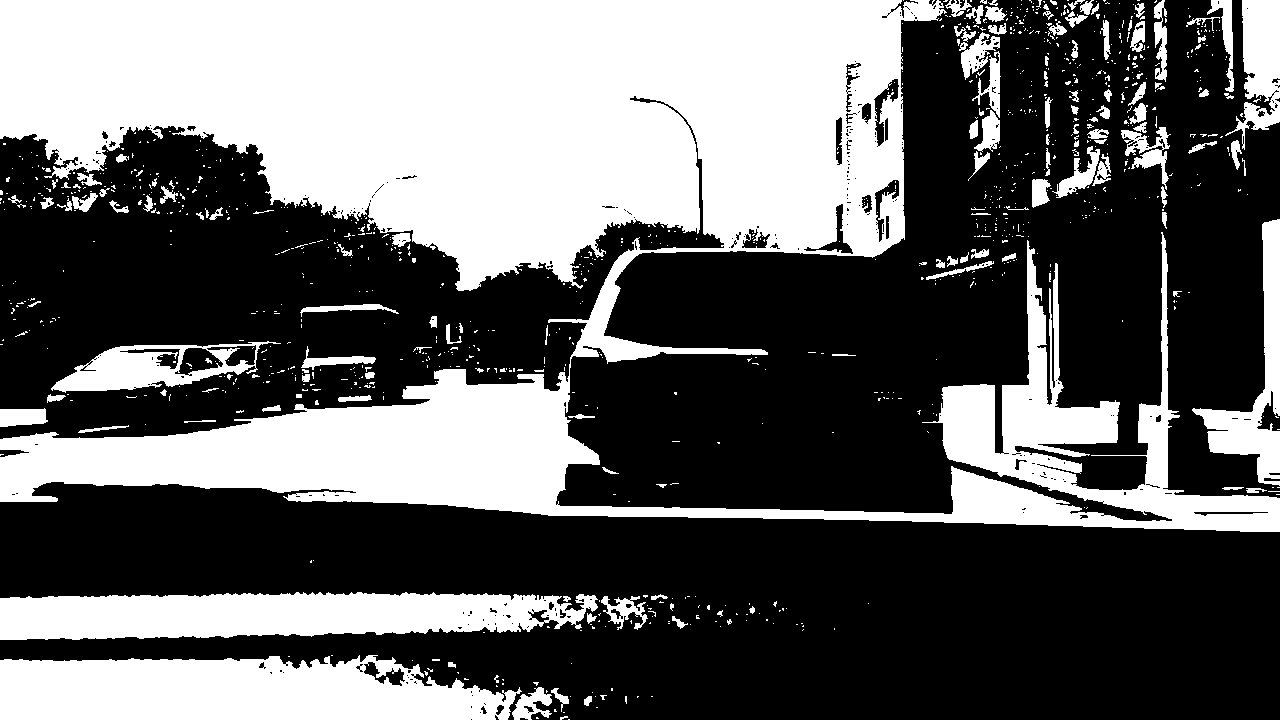

In [65]:
ret, thresh = cv2.threshold(gray, 127, 255, 0) # src, thresh, maxval, minval
# values below thresh = minval, values larger than thresh = maxval
cv2_imshow(thresh)

In [67]:
zeros = np.zeros(img.shape[:2], dtype= np.uint8)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
print(len(contours))

1482


In [73]:
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
contours = sorted(contours, key= cv2.contourArea, reverse=True)[:20] # 내림차순
back = np.zeros(img.shape, np.uint8)
for i in range(len(contours)):
    cv2.drawContours(back, contours, i, (0,255,255))

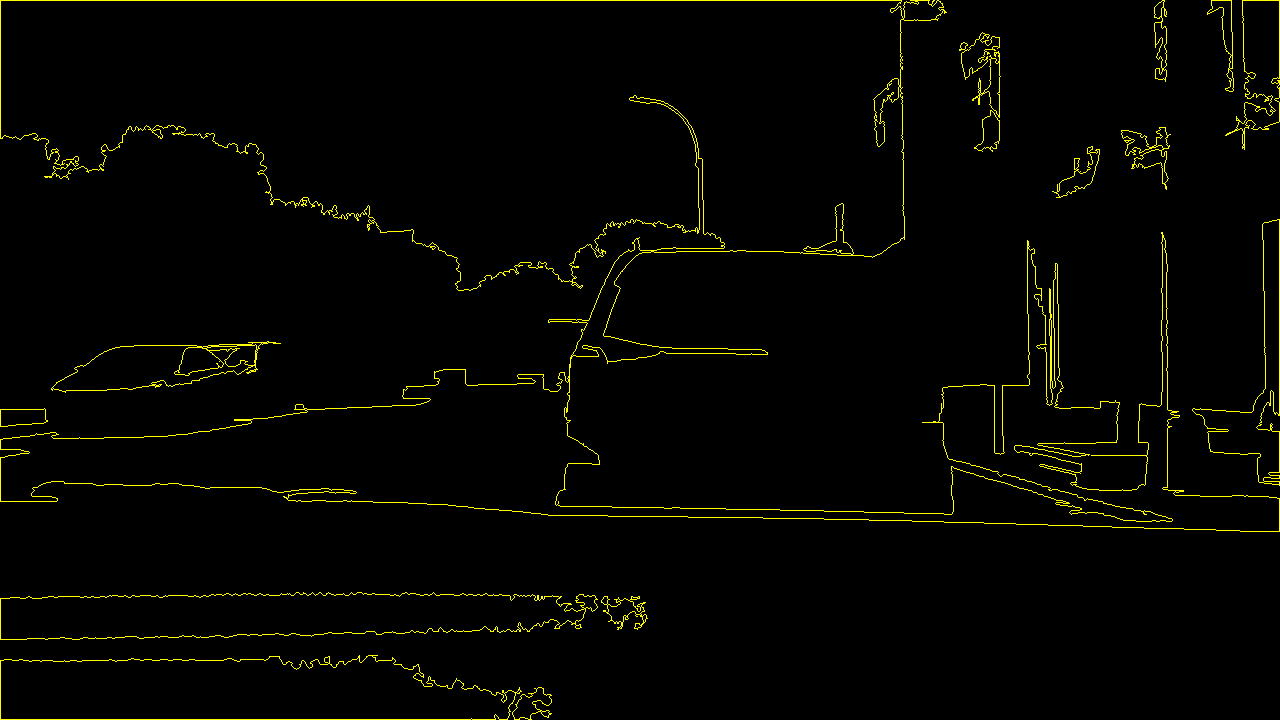

In [74]:
cv2_imshow(back)

[cv2.findContour](https://opencv-python.readthedocs.io/en/latest/doc/15.imageContours/imageContours.html)